In [29]:
import numpy as np # Importation de la bibliothèque NumPy pour effectuer des calculs numériques.
import pandas as pd # Importation de la bibliothèque pandas pour manipuler les données sous forme de DataFrame.
import warnings # Importation du module warnings pour gérer les avertissements.
import matplotlib.pyplot as plt # Importation de la bibliothèque Matplotlib pour tracer des graphiques.
import seaborn as sns # Importation de la bibliothèque Seaborn pour créer des visualisations attrayantes.
import tensorflow as tf # Importation de la bibliothèque TensorFlow pour l'apprentissage automatique.
from tensorflow.keras import regularizers # Importation des régularisateurs de TensorFlow Keras.
import xgboost as xgb # Importation de la bibliothèque XGBoost pour les modèles de renforcement de gradient.
from sklearn.decomposition import PCA # Importation de la classe PCA de scikit-learn pour l'analyse en composantes principales.
from sklearn import tree # Importation des algorithmes d'arbre de décision de scikit-learn.
from sklearn.naive_bayes import GaussianNB # Importation du classificateur naïf bayésien gaussien de scikit-learn.
from sklearn.linear_model import LogisticRegression # Importation de la régression logistique de scikit-learn.
from sklearn.neighbors import KNeighborsClassifier # Importation du classificateur des k plus proches voisins de scikit-learn.
from sklearn.tree import DecisionTreeClassifier # Importation du classificateur arbre de décision de scikit-learn.
from sklearn.preprocessing import RobustScaler # Importation de la classe RobustScaler de scikit-learn pour la mise à l'échelle des données.
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # Importation des classificateurs et régresseurs RandomForest de scikit-learn.
from sklearn.model_selection import train_test_split # Importation de la fonction train_test_split de scikit-learn pour diviser les données en ensembles d'entraînement et de test.
from sklearn import svm # Importation de la machine à vecteurs de support (SVM) de scikit-learn.
from sklearn import metrics # Importation des métriques de scikit-learn pour évaluer les performances des modèles.
pd.set_option('display.max_columns', None) # Configuration de pandas pour afficher toutes les colonnes des DataFrames.
warnings.filterwarnings('ignore') # Ignorer les avertissements.
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import pickle
%matplotlib inline 

In [30]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [31]:
data_train = pd.read_csv("KDDTrain+.txt")
test_data = pd.read_csv("KDDTest+.txt", sep=",", names=columns)

In [32]:
# Check data
data_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


Ce code définit une liste appelée "colonnes" qui contient les noms des différentes caractéristiques présentes dans les données. Chaque nom de colonne correspond à une variable spécifique telle que la durée, le type de protocole, le service, le drapeau, etc. Cela permet de référencer facilement chaque variable lors de l'analyse des données.

In [33]:
# Assign name for columns
data_train.columns = columns

Ce code affiche les premières lignes du DataFrame "data_train", ce qui permet de visualiser rapidement les premières observations du jeu de données. Cela est utile pour obtenir un aperçu initial des données et vérifier la structure, les types de variables et les valeurs présentes dans le jeu de données d'entraînement.

In [34]:
data_train.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [35]:
#Afficher les informations sur le jeu de données d'entraînement
# data_train.info()
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [36]:
#Afficher les statistiques descriptives du jeu de données d'entraînement
data_train.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,45567.100824,19779.271433,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.000000,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5870354.480801,4021285.112114,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.000000,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,276.000000,516.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1379963888.000000,1309937401.000000,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [37]:
#Remplacement les valeurs dans la colonne 'outcome'
data_train.loc[data_train['outcome'] == "normal", "outcome"] = 'normal'
data_train.loc[data_train['outcome'] != 'normal', "outcome"] = 'attack'
test_data.loc[test_data['outcome'] == "normal", "outcome"] = 'normal'
test_data.loc[test_data['outcome'] != 'normal', "outcome"] = 'attack'



In [38]:

def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

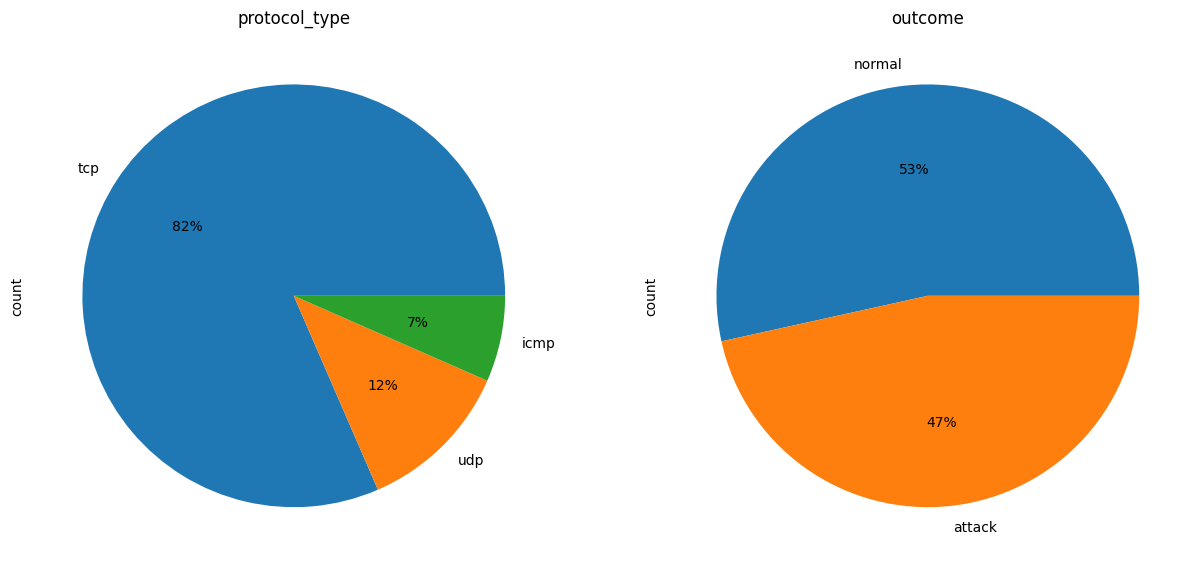

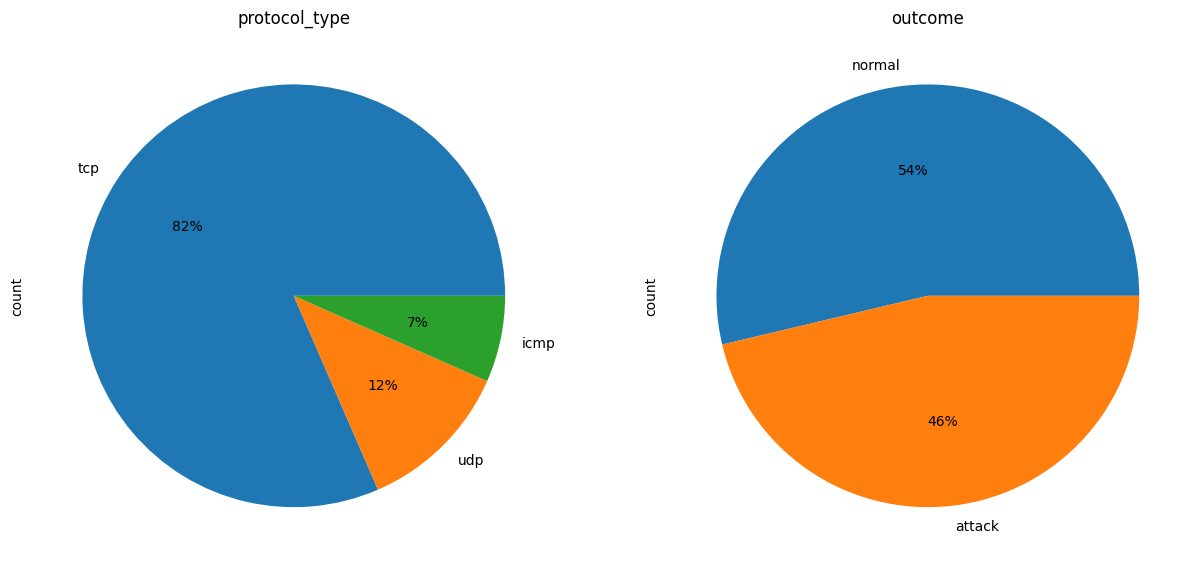

In [39]:
pie_plot(data_train, ['protocol_type', 'outcome'], 1, 2)
pie_plot(test_data, ['protocol_type', 'outcome'], 1, 2)


Tiền xử lý dữ liệu
Mã này định nghĩa một hàm gọi là "Chia tỷ lệ", lấy tham số là Khung dữ liệu của dữ liệu số "df_num" và danh sách các cột "cols" để chia tỷ lệ. Hàm này sử dụng đối tượng RobustScaler từ thư viện scikit-learning để thực hiện thay đổi quy mô dữ liệu mạnh mẽ. Nó áp dụng chuyển đổi cho dữ liệu số của Khung dữ liệu "df_num" bằng cách sử dụng phương thức "fit_transform" của đối tượng chia tỷ lệ. Sau đó, dữ liệu được chia tỷ lệ được lưu trữ trong Khung dữ liệu "std_df" mới với cùng các cột như được chỉ định trong "cols". Cuối cùng, DataFrame được chia tỷ lệ được hàm trả về.

In [40]:
# Fonction pour effectuer une mise à l'échelle des données numériques
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

In [41]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)
    
    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]
    
    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1
    
    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe

In [42]:
def preprocess_test_imputation(test_data, train_data):
    # Loại bỏ các cột không có trong train data khỏi test data
    test_data = test_data[train_data.columns]
    
    df_num = test_data.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    
    # Imputation bằng giá trị trung bình từ train data cho các features bị thiếu trong test data
    imputer = SimpleImputer(strategy='mean')
    for col in num_cols:
        if col in train_data.columns:
            # Nếu cột có trong train data thì lấy thông tin từ train data để impute cho test data
            imputer.fit(train_data[[col]])
            test_data[col] = imputer.transform(test_data[[col]])
    
    # Scaling các features số học
    scaled_df = Scaling(df_num, num_cols)
    test_data.drop(labels=num_cols, axis="columns", inplace=True)
    test_data[num_cols] = scaled_df[num_cols]
    
    # Tiền xử lý các cột categorical tương tự như đã làm với train data
    test_data = pd.get_dummies(test_data, columns=['protocol_type', 'service', 'flag'])
    return test_data

In [43]:
# Prétraitement des données d'entraînement
scaled_train = preprocess(data_train)
print(scaled_train)
scaled_test = preprocess(test_data)

        land  logged_in  is_host_login  is_guest_login outcome  level  \
0          0          0              0               0       0     15   
1          0          0              0               0       1     19   
2          0          1              0               0       0     21   
3          0          1              0               0       0     21   
4          0          0              0               0       1     21   
...      ...        ...            ...             ...     ...    ...   
125967     0          0              0               0       1     20   
125968     0          0              0               0       0     21   
125969     0          1              0               0       0     18   
125970     0          0              0               0       1     20   
125971     0          1              0               0       0     21   

        duration  src_bytes  dst_bytes  wrong_fragment  urgent  hot  \
0            0.0   0.369565   0.000000             0

In [44]:
def handle_missing_features(data, train_encoded_columns):
    # Get the columns in X_train that are not present in data
    missing_features = set(train_encoded_columns) - set(data.columns)
    missing_features = list(missing_features)
    
    # Create a DataFrame with missing features and fill with zeros
    missing_df = pd.DataFrame(False, index=data.index, columns=missing_features)
    
    # Concatenate the new DataFrame with the original data, specifying the column order
    new_data = pd.concat([data, missing_df], axis=1)
    
    # Reorder the columns in the same order as in X_train
    new_data = new_data[train_encoded_columns]
    
    return new_data
    

Mã này thực hiện các bước sau:

-Lựa chọn các biến dự đoán bằng cách loại trừ các cột 'kết quả' và 'mức độ' của Khung dữ liệu "scaled_train" và lưu trữ các giá trị trong "x". - Trích xuất các giá trị của biến mục tiêu 'kết quả' từ DataFrame "scaled_train" và lưu trữ trong "y". -Trích xuất các giá trị của biến mục tiêu hồi quy 'cấp' từ DataFrame "scaled_train" và lưu trữ trong "y_reg". -Giảm kích thước của các biến dự đoán bằng phân tích thành phần chính (PCA) với 20 thành phần chính. Giá trị giảm được lưu trữ trong "x_reduced". -Hiển thị số lượng tính năng ban đầu trong "x" và số lượng tính năng giảm trong "x_reduced" sau khi áp dụng PCA. - Chuyển đổi kiểu của biến mục tiêu "y" thành số nguyên. -Tách dữ liệu thành tập huấn luyện và kiểm tra để phân loại, sử dụng tỷ lệ kiểm tra là 20% và hạt giống ngẫu nhiên là 42. Tập huấn luyện và kiểm tra được lưu trữ trong "x_train", "x_test", "y_train" và "y_test". -Tách dữ liệu rút gọn thành các tập huấn luyện và tập kiểm tra để phân loại, sử dụng cùng một tỷ lệ kiểm tra và cùng một hạt giống ngẫu nhiên. Các tập huấn luyện và kiểm tra rút gọn được lưu trữ trong "x_train_reduced", "x_test_reduced", "y_train_reduced" và "y_test_reduced". -Tách dữ liệu thành tập huấn luyện và tập kiểm tra để hồi quy, sử dụng cùng một tỷ lệ kiểm tra và cùng một hạt giống ngẫu nhiên. Các tập huấn luyện và kiểm tra hồi quy được lưu trữ trong "x_train_reg", "x_test_reg", "y_train_reg" và "y_test_reg".

In [45]:
x = scaled_train.drop(['outcome', 'level'], axis=1).values
y = scaled_train['outcome'].values
y_reg = scaled_train['level'].values

x = scaled_train.drop(['outcome', 'level'], axis=1).values

y = scaled_train['outcome'].values

y_reg = scaled_train['level'].values

# Réduction de dimension avec PCA
pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)

print("Le nombre de caractéristiques originales est {} et le nombre de caractéristiques réduites est {}".format(x.shape[1], x_reduced.shape[1]))

y = y.astype('int')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)

Le nombre de caractéristiques originales est 122 et le nombre de caractéristiques réduites est 20


In [46]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    y_pred_train =  model.predict(X_train)
    y_pred_test =  model.predict(X_test)
    train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
    test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
    train_precision = metrics.precision_score(y_train, y_pred_train)
    test_precision = metrics.precision_score(y_test, y_pred_test)
    
    train_recall = metrics.recall_score(y_train, y_pred_train)
    test_recall = metrics.recall_score(y_test, y_pred_test)
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix_test = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = ['normal', 'attack'])
    confusion_matrix_train = metrics.confusion_matrix(y_train, y_pred_train)
    cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = ['normal', 'attack'])

    
    cls_report_test =classification_report(y_true=y_test,y_pred=y_pred_test,target_names= ['normal', 'attack'])
    cls_report_train =classification_report(y_true=y_train,y_pred=y_pred_train,target_names= ['normal', 'attack'])
    print("classification_report-TEST:")
    print(cls_report_test)
    print("classification_report-TRAIN:")
    print(cls_report_train)
    fig, ax = plt.subplots(figsize=(10,10))
    
    fi1, ax1 = plt.subplots(figsize=(10,10))
    ax.grid(False)
    plt.title ="confusion matrix 1"
    cm_display.plot(ax=ax)
    plt.title ="confusion matrix 2"
    cm_display1.plot(ax=ax1)
    ax.set_title('Confusion Matrix (Train -' + name + ' )') 
    ax1.set_title('Confusion Matrix (Test -' + name + ' )') 

    
    # export_model_path = "model_NB_F.pkl"
    #  # Xuất model nếu được chỉ định đường dẫn
    # if export_model_path is not None:
    #     with open(export_model_path, 'wb') as f:
    #         pickle.dump(model, f)
    #     with open(export_model_path, 'rb') as f:
    #         gnb_loaded= pickle.load(f)
    #         print("result:", gnb_loaded)
    #     print("Exported model saved successfully at:", export_model_path)

SyntaxError: unterminated string literal (detected at line 41) (2819961717.py, line 41)

Naive Bayes
Bộ phân loại Naive Bayes là tập hợp các thuật toán phân loại dựa trên Định lý Bayes. Nó không phải là một thuật toán đơn lẻ mà là một nhóm các thuật toán trong đó tất cả chúng đều có chung một nguyên tắc. Mỗi cặp tính năng được phân loại là độc lập với nhau. Các giả định do Naive Bayes đưa ra thường không đúng trong các tình huống thực tế. Trên thực tế, giả định về tính độc lập không bao giờ đúng nhưng thường hoạt động tốt trong thực tế.

Bây giờ, điều quan trọng là phải biết về định lý Bayes.

Định lý Bayes
Định lý Bayes tìm xác suất của một sự kiện xảy ra với xác suất của một sự kiện khác đã xảy ra. Định lý Bayes được phát biểu dưới dạng toán học như phương trình sau:

trong đó A và B là các biến cố và P(B) ≠ 0.

Về cơ bản, chúng tôi đang cố gắng tìm xác suất của sự kiện A, nếu sự kiện B là đúng. Sự kiện B cũng được gọi là bằng chứng.
P(A) là tiên nghiệm của A (xác suất tiên nghiệm, tức là Xác suất của sự kiện trước khi nhìn thấy bằng chứng). Bằng chứng là một giá trị thuộc tính của một trường hợp không xác định (ở đây, đó là sự kiện B).
P(A|B) là xác suất hậu nghiệm của B, tức là xác suất của sự kiện sau khi bằng chứng được nhìn thấy.


Training Accuracy GaussianNB 91.80269307480874  Test Accuracy GaussianNB 91.60547727723754
Training Precesion GaussianNB 92.62657528189256  Test Precesion GaussianNB 92.53246753246754
Training Recall GaussianNB 89.47907990004485  Test Recall GaussianNB 89.29629943263613
classification_report-TEST:
              precision    recall  f1-score   support

      normal       0.91      0.94      0.92     13386
      attack       0.93      0.89      0.91     11809

    accuracy                           0.92     25195
   macro avg       0.92      0.91      0.92     25195
weighted avg       0.92      0.92      0.92     25195

classification_report-TRAIN:
              precision    recall  f1-score   support

      normal       0.91      0.94      0.92     53956
      attack       0.93      0.89      0.91     46821

    accuracy                           0.92    100777
   macro avg       0.92      0.92      0.92    100777
weighted avg       0.92      0.92      0.92    100777

Training Accuracy 

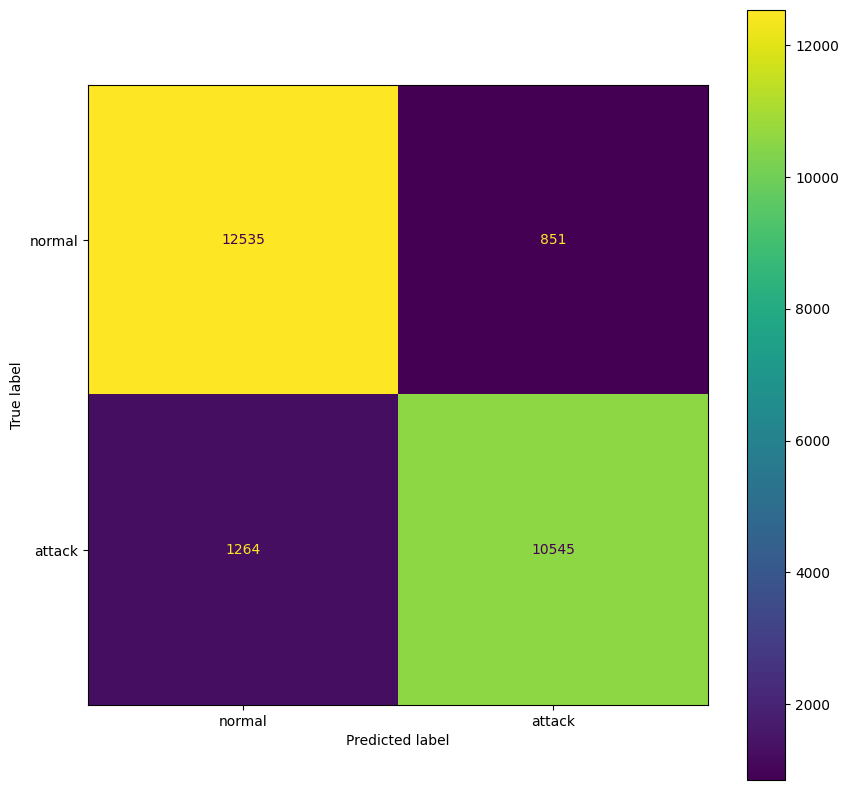

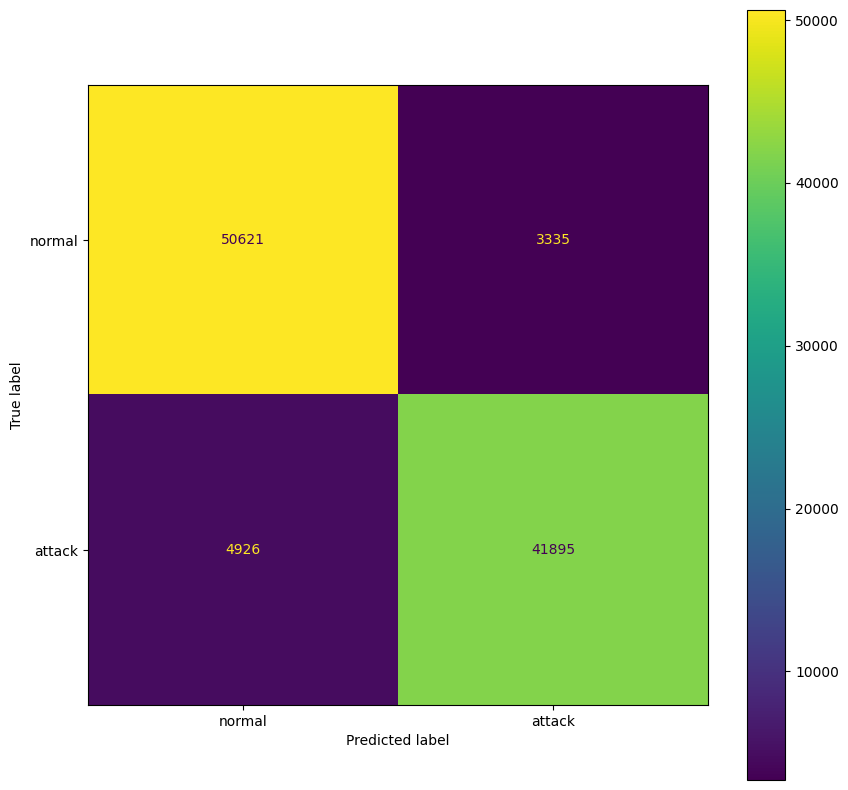

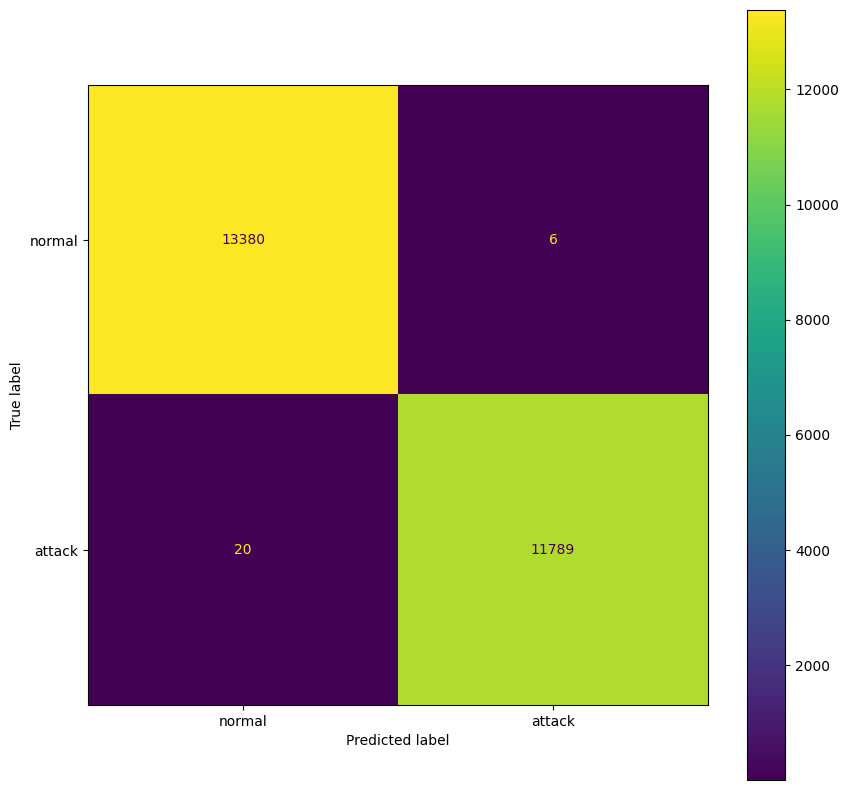

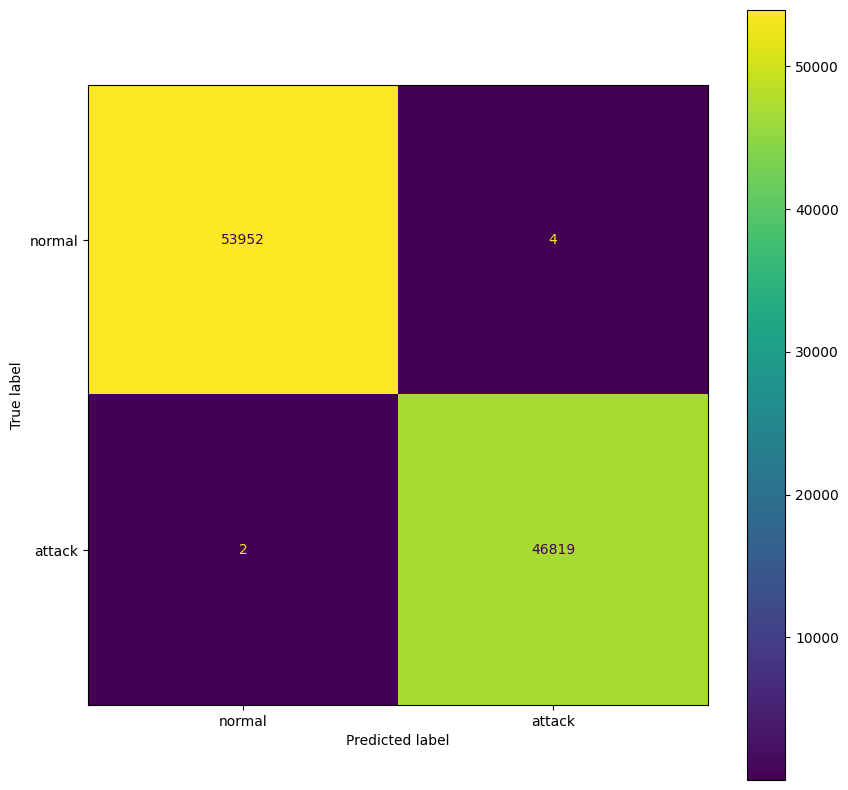

In [ ]:
gnb = GaussianNB().fit(x_train, y_train)
rf = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(gnb, "GaussianNB", x_train, x_test, y_train, y_test)
evaluate_classification(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)
